# Examples
## Freely expanding 1D Gaussian wave packet
Import the pytalises package

In [1]:
import pytalises as pt
import numpy as np
import matplotlib.pyplot as plt

and instantiate a wave function constituent of 128 complex amplitudes that represent the wave function is position space.

(128,)


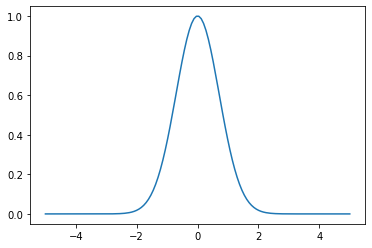

In [2]:
psi = pt.Wavefunction(["exp(-x**2)"],
    number_of_grid_points=(128,), spatial_ext=[(-5,5)])
print(psi.amp.shape)
plt.plot(psi.r[0], np.abs(psi.amp))

The wave packet can be freely propagated (meaning that $V=0$, or $i\partial_t \psi (r,t)=\frac{\hbar}{2m}\nabla^2 \psi(r,t)$) using the `freely_propagate` function.

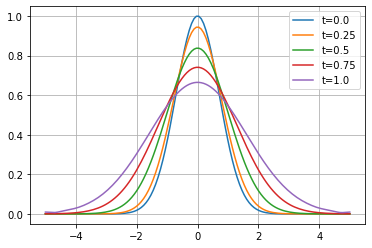

In [3]:
for i in range(5):
    plt.plot(psi.r[0], np.abs(psi.amp), label="t="+str(psi.t))
    pt.freely_propagate(psi, num_time_steps=1, Delta_t=0.25)
plt.legend()
plt.grid()

## Free expansion with initial momentum
The wave funciton is given an initial momentum of $k$ by multiplying it with $\exp (-ikx)$.

In [4]:
psi = pt.Wavefunction(['exp(-(x-x0)**2)*exp(-1j*k*x)'],
    variables={'x0': -5.0, 'k': 10.0}, number_of_grid_points=(128,),
    spatial_ext=[(-10,10)])

Additionaly the wave function is offset by $x_0 = -5$.

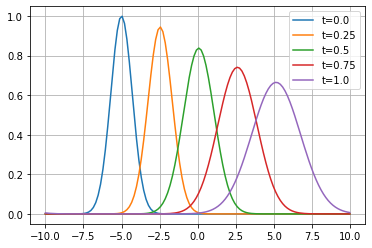

In [5]:
psi = pt.Wavefunction(['exp(-(x-x0)**2)*exp(-1j*k*x)'],
    variables={'x0': -5.0, 'k': 10.0}, number_of_grid_points=(128,),
    spatial_ext=[(-10,10)])
for i in range(5):
    plt.plot(psi.r[0], np.abs(psi.amp), label="t="+str(psi.t))
    pt.freely_propagate(psi, num_time_steps=1, Delta_t=0.25)
plt.legend()
plt.grid()

After one time unit, the wave packet traveled 10 position units, as expected with momentum $k=10$.
This unitless represantation is due to the fact that we did not define a mass (optional parameter `m`) for the `Wavefunction` object. In that case the Schrödinger equation simply becomes
$$
i\partial\psi(r,t) = \frac{1}{2}\nabla^2 \psi(r,t)
$$

## 2D harmonic potential
Now we propagate a wavefunction in a potential $V/\hbar = \frac{1}{2}\omega_x^2 x^2 + \frac{1}{2}\omega_y^2 y^2$ (if not otherwise specified, the mass always equals $\hbar$). Furthermore we chose $\omega_y = \omega_x = 2\pi 1 \text{s}^{-1}$. One period in the harmonic trap takes one second.
The Schrödinger equation is then
$$
i\partial_t \psi (x,y,t) = \bigg(\frac{1}{2}\omega^2 (x^2 +  y^2) + \frac{1}{2}\nabla^2\bigg) \psi (x,y,t)
$$

Now we can use the `propagate` function.

Text(0.5, 0.98, 'One period in 2D isotropic harmonic trap')

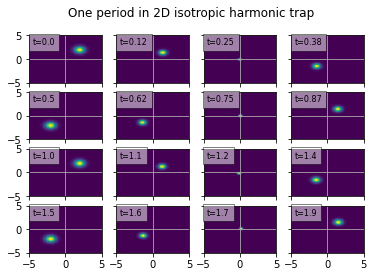

In [6]:
psi = pt.Wavefunction(["exp(-(x-2)**2-(y-2)**2)"],
    number_of_grid_points= (128,128), spatial_ext=[(-5,5),(-5,5)])
#%config InlineBackend.figure_formats = ['png']
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True)
for i in range(4):
    for j in range(4):
        axs[i,j].pcolormesh(psi.r[0], psi.r[1], np.abs(psi.amp**2).T,
            rasterized=True)
        axs[i,j].annotate("t={:.2}".format(psi.t), (-4.5,3), fontsize=8)\
            .set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
        axs[i,j].grid()
        pt.propagate(psi, ["1/2*omega_x**2*x**2 + 1/2*omega_y**2*y**2"],
            variables={'omega_x': 2*np.pi*1, 'omega_y': 2*np.pi*1},
            diag=True, num_time_steps=10, Delta_t=0.0125)
fig.suptitle("One period in 2D isotropic harmonic trap")

One can see that the wave packet moves periodically with a frequency of one period per time unit in a diagonal line of the 2D harmonic trap.
In calling the `propagate` function we set `diag=True`. This makes the calculation for the time propagation much faster as no numerically diagonalization of the potential energy term is invoked (even though with only one internal state, the potential $V$ can not have any nondiagonal terms).

In [7]:
def time_propagate(diag):
    psi = pt.Wavefunction(["exp(-(x-2)**2-(y-2)**2)"],
        number_of_grid_points= (128,128), spatial_ext=[(-5,5),(-5,5)])
    pt.propagate(psi, ["1/2*omega_x**2*x**2 + 1/2*omega_y**2*y**2"],
        variables={'omega_x': 2*np.pi*1, 'omega_y': 2*np.pi*1},
        diag=diag, num_time_steps=10, Delta_t=0.0125)
%timeit time_propagate(diag=True)
%timeit time_propagate(diag=False)

26.7 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
139 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Rabi cycles in two level system
In this example a gaussian wave packet in a ground state is coherently transfered to an excited state. During this the wave packet will further disperse. The time evolution is

$$
i \partial_t \psi (x,t) = 
\Bigg(
\frac{1}{2}
\begin{pmatrix}
0 & \Omega_R\\
\Omega_R & 0
\end{pmatrix}
+
\frac{1}{2}\nabla^2
\Bigg)
\psi (x,t)
$$

The Rabi frequency will be $\Omega_R=2\pi f_R = 2\pi 1\text{s}^{-1}$, such that after one time unit a complete population inversion is achieved.

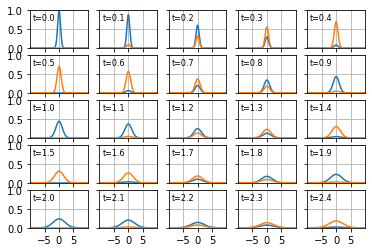

In [8]:
psi = pt.Wavefunction(["exp(-x**2)", "0"], number_of_grid_points=(128,),
    spatial_ext=[(-10,10)] )
fig, axs = plt.subplots(5,5,sharey=True) 
for i in range(5):
    for j in range(5):
        axs[i,j].plot(psi.r[0], np.abs(psi.amp[:,0])**2,
            psi.r[0], np.abs(psi.amp[:,1])**2)
        axs[i,j].set_xticks([-5,0,5])
        axs[i,j].set_yticks([0,0.5,1])
        axs[i,j].set_ylim(0,1)
        axs[i,j].set_xlim(-10,10)
        axs[i,j].annotate("t={:.2}".format(psi.t), (-9,0.75), fontsize=8)
        axs[i,j].grid()
        pt.propagate(psi, ["0", "2*pi*f_R/2", "0"], variables={'f_R': 1, 'pi': np.pi},
            num_time_steps=1, Delta_t=0.1)

Note that in this example we have a nondiagonal potential as the eigenstates interact. Thus we can not use the `diag=True` option that was used in the previous example in order to speed up the calculations.

## Diffraction on grating
In this example a 2d Gaussian wave packet is diffracted on a periodic potential.
The library that is uses by pytalises to evaluate mathematical expressions that describe wave functions or potentials is [numexpr](https://numexpr.readthedocs.io/projects/NumExpr3/en/latest/index.html). A list of supported operators and functions that you can use to construct your wave function or potential can be found [here](https://numexpr.readthedocs.io/projects/NumExpr3/en/latest/user_guide.html#supported-operators). In this specific example we use the `where(cond, a, b)` function for realizing the potential. It either outputs `a` or `b` depending on wether the condition `cond` is fulfilled or not.

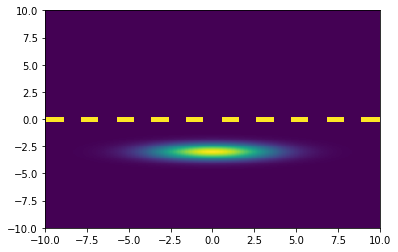

In [9]:
import numexpr as ne

psi = pt.Wavefunction(
    ["exp(-((x-x0)/sigmax)**2)*exp(-((y-y0)/sigmay)**2)*exp(-1j*ky*y)"], 
    variables={'x0': 0, 'y0': -3, 'sigmax':5, 'sigmay': 1, 'ky': 3 },
    number_of_grid_points=(256,256),
    spatial_ext=[(-10,10),(-10,10)],
    )
# String that describes the potential (see numexpr documentaiton for allowed functions)
v = "where(y<.2, 1, 0)*where(y>-.2, 1, 0)*where(cos(3*x)<0, 1, 0)*1000"
potential = ne.evaluate(v, local_dict=psi.default_var_dict)[:,:,0].T
plt.pcolormesh(psi.r[0], psi.r[1],
    np.abs(psi.amp**2).T+potential,
    rasterized=True, vmax=np.max(np.abs(psi.amp**2)))

We have given the wave function an initial momentom of $k_y=3$ and offset it by $y_0=-3$.
After one time unit the center of mass will have collided with the periodic grating.

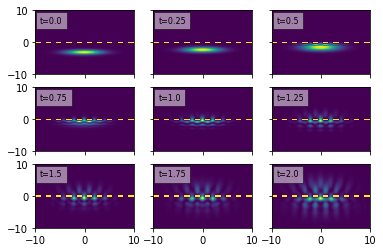

In [10]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        axs[i,j].pcolormesh(psi.r[0], psi.r[1],
            np.abs(psi.amp**2).T+potential,
            rasterized=True, vmax=np.max(np.abs(psi.amp**2)))
        axs[i,j].annotate("t={:.3}".format(psi.t), (-9,6), fontsize=8)\
            .set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
        pt.propagate(psi, [v], num_time_steps=250, Delta_t=0.001, diag=True)

## Nonlinear interactions between internal states
In addition to the variables `x`,`y`,`z` and `t` you can use wave function amplitudes in your defined potentials to solve a nonlinear Schrödinger equation

$$
i\partial_t \psi (r,t) = 
\bigg(
    \frac{\hbar}{2m}\nabla^2+\frac{1}{\hbar}V(r,t,\psi (r,t))
\bigg)
\psi (r,t)
$$

Depending on the number of internal states `N` your wave function has, the wave function amplitudes can be used in the potential by calling `psi0`, `psi1` ... `psiN`.

In this example we create a wave function with two internal states. The first one is going to be stationary in position space whilst the other approaches it and scatters.

The equation that we solve is

$$
i \partial_t 
\begin{bmatrix}
\psi_0 (x,t) \\
\psi_1 (x,t)
\end{bmatrix}
= 
\Bigg(
\frac{1}{2}
\begin{bmatrix}
0 & 0\\
0 & g\cdot |\psi_0(x,t)|^2
\end{bmatrix}
+
\frac{1}{2}\nabla^2
\Bigg)
\begin{bmatrix}
\psi_0 (x,t) \\
\psi_1 (x,t)
\end{bmatrix}.
$$

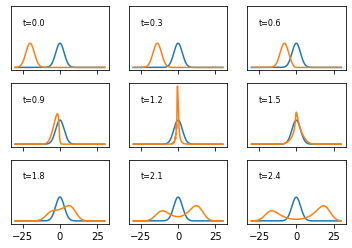

In [11]:
psi = pt.Wavefunction(
    ["exp(-(x/2/sigmax)**2)","exp(-((x+x0)/2/sigmax)**2)*exp(-1j*k*x)"], 
    variables={'x0': 20, 'sigmax':2, 'k': 20 },
    number_of_grid_points=(512,),
    spatial_ext=[(-30,30),],
    )

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True) 
for i in range(3):
    for j in range(3):
        axs[i,j].plot(psi.r[0], np.abs(psi.amp[:,0]),
            psi.r[0], np.abs(psi.amp[:,1]))
        axs[i,j].annotate("t={:.2}".format(psi.t), (-25,1.75), fontsize=8)
        axs[i,j].set_yticks([])
        pt.propagate(psi, ["0","g*abs(psi0)**2"],
            variables={'g': 200},
            num_time_steps=3, Delta_t=0.1, diag=True)